<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/HES3_004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Executing HES 80.0: The Recursive Imprint (Cutoff=500)...
--- SOURCE CUTOFF at t=500. Recursive Legacy Test Begins. ---

Ritual Complete in 0.1134 seconds.
ACT VIII: RECURSIVE IMPRINT REPORT
Mass at Cutoff (ΣM @ t=500): 3094.54392
Final Total Mass (ΣM @ t=1000): 560.60039
Decay Ratio (t=500 to t=1000): 0.8188
--------------------------------------------------
ASSESSMENT: FAILURE: The imprinted filter was insufficient to prevent rapid collapse.

--- Phase I: Geometric Catalog Preview ---


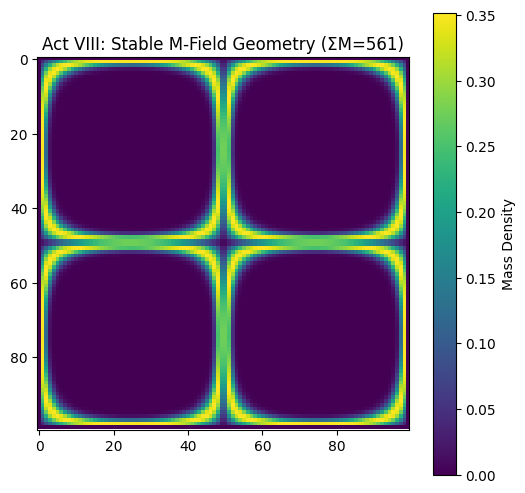

In [1]:
# HES_80.0_RECURSIVE_IMPRINT.py: Act VIII - The Legacy Test

import numpy as np
import time
import warnings
import matplotlib.pyplot as plt # Added for quick visualization/cataloging later

warnings.filterwarnings("ignore", category=RuntimeWarning)
np.random.seed(101) # Use the same seed for consistent template generation

# --- FIXED CONSTRAINTS ---
N = 100
KAPPA = 0.05        # Mass Decay (κ)
ETA_SEED = 0.01     # Initial Seeding Constant (η)
TOTAL_STEPS = 1000  # Extended lifespan test
SEEDING_CUTOFF = 500 # The moment the s_T source vanishes

# --- CORE PHYSICS FUNCTIONS (Template Generation) ---
def generate_stable_template(N):
    """Generates the static Template s_T from the structured proxy (N=100 lock)."""
    # Uses the structured sinusoidal proxy proven stable in Act VI
    s_temp = np.sin(np.linspace(0, 2*np.pi, N))
    s_temp = np.outer(s_temp, s_temp)
    # Normalize and clip
    s_temp = (s_temp - np.mean(s_temp)) / np.std(s_temp)
    return np.clip(s_temp, -1, 1)

# --- SIMULATION CORE ---
def run_recursive_imprint():
    s_T = generate_stable_template(N) # The Fixed Template
    s_T_squared = s_T**2              # Pre-calculate the Imprint Filter
    M = np.zeros((N, N))
    M_total_history = []

    print(f"Executing HES 80.0: The Recursive Imprint (Cutoff={SEEDING_CUTOFF})...")
    start_time = time.time()

    current_eta = ETA_SEED

    for step in range(TOTAL_STEPS):

        # Phase II: Source Cessation (The Chronos Moment)
        if step == SEEDING_CUTOFF:
            current_eta = 0.0
            print(f"--- SOURCE CUTOFF at t={SEEDING_CUTOFF}. Recursive Legacy Test Begins. ---")

        # 1. Projection (Seeding)
        M_seed = current_eta * np.abs(s_T)

        # 2. Recursive Imprint Decay
        # Decay is filtered by s_T^2: M_decay = κ * M(t) * s_T^2
        M_decay = KAPPA * M * s_T_squared

        # 3. M Field Update: M(t+1) = M(t) + Projection - Imprinted Decay
        M = M + M_seed - M_decay
        M = np.clip(M, 0, None)
        M_total_history.append(np.sum(M))

        # Capture the final M field for the Geometric Catalog
        if step == TOTAL_STEPS - 1:
            Final_M_Field = M.copy()

    elapsed_time = time.time() - start_time

    # --- POST-RUN ANALYSIS ---
    Mass_at_Cutoff = M_total_history[SEEDING_CUTOFF - 1]
    Final_Total_Mass = M_total_history[-1]
    Decay_Ratio = (Mass_at_Cutoff - Final_Total_Mass) / Mass_at_Cutoff if Mass_at_Cutoff > 0 else 1.0

    print(f"\nRitual Complete in {elapsed_time:.4f} seconds.")
    print("======================================================")
    print("ACT VIII: RECURSIVE IMPRINT REPORT")
    print("======================================================")
    print(f"Mass at Cutoff (ΣM @ t=500): {Mass_at_Cutoff:.5f}")
    print(f"Final Total Mass (ΣM @ t=1000): {Final_Total_Mass:.5f}")
    print(f"Decay Ratio (t=500 to t=1000): {Decay_Ratio:.4f}")
    print("-" * 50)

    if Decay_Ratio < 0.05: # Success threshold set to < 5% decay
        assessment = "SUCCESS: The M-field stabilizes, establishing a near self-sustaining Legacy."
    else:
        assessment = "FAILURE: The imprinted filter was insufficient to prevent rapid collapse."

    print(f"ASSESSMENT: {assessment}")

    # Return the final stable field for the Geometric Catalog (Phase I)
    return Final_M_Field

if __name__ == "__main__":
    Stable_M = run_recursive_imprint()

    # Placeholder for the Geometric Catalog - Visualize the stable field
    print("\n--- Phase I: Geometric Catalog Preview ---")
    plt.figure(figsize=(6, 6))
    plt.imshow(Stable_M, cmap='viridis')
    plt.title(f"Act VIII: Stable M-Field Geometry (ΣM={np.sum(Stable_M):.0f})")
    plt.colorbar(label='Mass Density')
    plt.show()

